In [4]:
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier

import shap

In [5]:
shap.__version__

'0.28.5'

### Sequence alignment files (.aln format)

Put the files names (relative paths) in a list.

We will iterate over this list to read the sequences into dataframes.

In [6]:
file_1 = '../DATA/!CLEAN/2019-01-30_ZIBRA2_YFV-RIO-Diferentes_CTs'

file_2 = '../DATA/!CLEAN/NHP_65_outbreak'

file_3 = '../DATA/!CLEAN/2018-01_Salvador'

file_4 = '../DATA/!CLEAN/2018-03-04_LACEN_Bahia'

file_5 = '../DATA/!CLEAN/FUNED_AGOSTO-2018'

file_6 = '../DATA/!CLEAN/RIO_DE_JANEIRO'

file_7 = '../DATA/!CLEAN/YFV_LACEN_BAHIA'

In [7]:
file_list = [file_1,
            file_2,
            file_3,
            file_4,
            file_5,
            file_6,
            file_7]
seq_list = []
metadata_list = []

In [8]:
for file in file_list:
    seq_file = file + '.aln'
    metadata_file = file + '.xlsx'
    
    seq_list.append(seq_file)
    metadata_list.append(metadata_file)

### Metadata
The following code reads the excel spreadsheet containing the metadata related to the sequences and includes them in the dataframe.

One spreadsheet per group of sequences from ZIBRA database, all into a _dictionary_.

I only keep the information I'm going to use now, i.e., 'Host', 'Date' and 'Ct'.

I use regex to link the spreadsheet to the sequences.


In [9]:
def read_metadata(excel_file):
    metadata_df = pd.read_excel(excel_file, index_col='index')
    metadata_df = metadata_df[['Virus', 'Host', 'Date', 'Ct']]
    return metadata_df

In [11]:
metadata_dict = {}
for file in metadata_list:
    print(file)
    metadata_df = read_metadata(file)
    metadata_dict[file] = metadata_df

../DATA/!CLEAN/2019-01-30_ZIBRA2_YFV-RIO-Diferentes_CTs.xlsx
../DATA/!CLEAN/NHP_65_outbreak.xlsx
../DATA/!CLEAN/2018-01_Salvador.xlsx
../DATA/!CLEAN/2018-03-04_LACEN_Bahia.xlsx
../DATA/!CLEAN/FUNED_AGOSTO-2018.xlsx
../DATA/!CLEAN/RIO_DE_JANEIRO.xlsx
../DATA/!CLEAN/YFV_LACEN_BAHIA.xlsx


### Merge all dataframes into one 

In [13]:
metadata = list(metadata_dict.values())

In [15]:
len(metadata)

7

In [16]:
for spreadsheet in metadata:
    print(spreadsheet.shape)

(60, 4)
(27, 4)
(21, 4)
(11, 4)
(15, 4)
(2, 4)
(22, 4)


In [17]:
metadata = pd.concat(metadata)

In [23]:
metadata

,Virus,Host,Date,Ct
index,,,,
RJY01,YFV,Alouatta,2017-03-08 00:00:00,11.220
RJY02,YFV,Alouatta,2017-03-19 00:00:00,8.000
RJY03,YFV,Alouatta,2017-05-02 00:00:00,11.560
RJY04,YFV,Alouatta,2017-12-22 00:00:00,11.450
RJY05,YFV,Alouatta,2018-01-18 00:00:00,11.040
RJY06,YFV,Alouatta,2017-02-02 00:00:00,16.955
RJY07,YFV,Alouatta,2017-02-10 00:00:00,9.370
RJY08,YFV,Alouatta,2017-03-27 00:00:00,11.280
RJY09,YFV,Alouatta,2017-02-13 00:00:00,22.300


### Data Cleaning

In [25]:
metadata = metadata[metadata['Ct'].notnull()]

In [33]:
ct = pd.to_numeric(metadata['Ct'])
ct = ct.astype(np.float16)

metadata['Ct'] = ct

In [34]:
metadata['Date'] = pd.to_datetime(metadata['Date'])

In [36]:
metadata.replace('Allouata', 'Alouatta', inplace=True)
metadata.replace('cebidae', 'Cebidae', inplace=True)
metadata.replace('NHP (unk)', 'unk', inplace=True)
metadata.replace('Sem informação','unk', inplace=True)

print(metadata['Host'].unique())

['Alouatta' 'Callithrix' 'Callicebus' 'Leontopithecus rosalia' 'Cebus'
 'unk' 'Cebidae' 'H' 'NHP']


In [38]:
print(metadata['Virus'].unique())

['YFV' 'YFV_POS' 'YFV_POS mesmo que #7922' 'YFV_POS mesmo que #7921'
 'YFV_POS mesmo que #24' 'YFV_POS mesmo que #23' 'YFV_POS mesmo que #102'
 'YFV_POS mesmo que #101' 'YF Positive']


In [39]:
metadata['Virus'] = "YFV"

In [40]:
metadata.head()

,Virus,Host,Date,Ct
index,,,,
RJY01,YFV,Alouatta,2017-03-08,11.218750
RJY02,YFV,Alouatta,2017-03-19,8.000000
RJY03,YFV,Alouatta,2017-05-02,11.562500
RJY04,YFV,Alouatta,2017-12-22,11.453125
RJY05,YFV,Alouatta,2018-01-18,11.039062


In [41]:
metadata.insert(4, 'Season', 'season')

In [42]:
mask = metadata['Date'] < pd.datetime(2017,8,1)
metadata.loc[mask, 'Season'] = '2016/2017'

mask = metadata['Date'] >= pd.datetime(2017,8,1)
metadata.loc[mask, 'Season'] = '2017/2018'

metadata

,Virus,Host,Date,Ct,Season
index,,,,,
RJY01,YFV,Alouatta,2017-03-08,11.218750,2016/2017
RJY02,YFV,Alouatta,2017-03-19,8.000000,2016/2017
RJY03,YFV,Alouatta,2017-05-02,11.562500,2016/2017
RJY04,YFV,Alouatta,2017-12-22,11.453125,2017/2018
RJY05,YFV,Alouatta,2018-01-18,11.039062,2017/2018
RJY06,YFV,Alouatta,2017-02-02,16.953125,2016/2017
RJY07,YFV,Alouatta,2017-02-10,9.367188,2016/2017
RJY08,YFV,Alouatta,2017-03-27,11.281250,2016/2017
RJY09,YFV,Alouatta,2017-02-13,22.296875,2016/2017


In [43]:
import seaborn as sns
sns.set(style="whitegrid")

In [44]:
callithrix_df = metadata[metadata['Host'] == 'Callithrix']

alouatta_df = metadata[metadata['Host'] == 'Alouatta']


In [75]:
def plot_figures(filename, df):
    fig, ax = plt.subplots()

    x = df['Date'].values
    y = df['Ct'].values

    ax = plt.scatter(x, y)
    plt.title(filename + ' Ct values')
    
    plt.xlabel('Date')
    plt.ylabel('Ct');
    
    fig.savefig('Scatter_' + filename +'.png', format='png', dpi=300, transparent=False)
    
    fig, ax = plt.subplots()
    data_17 = df[df['Date'] <= pd.datetime(2017,8,1)]
    data_18 = df[df['Date'] > pd.datetime(2017,8,1)]
    ax = plt.boxplot([data_17['Ct'], data_18['Ct']], labels=['2016/2017', '2017/2018'])
    plt.title(filename + ' Ct values boxplot per season')
    plt.xlabel('Season')
    plt.ylabel('Ct');
    
    fig.savefig('BoxPlot_' + filename + '.png', format='png', dpi=300, transparent=False)
    
    fig, ax = plt.subplots()
    ax = sns.violinplot(x="Season", y="Ct", data=df)
    plt.title(filename + ' Ct values violin plot per season');
    
    fig.savefig('ViolinPlot_' + filename + '.png', format='png', dpi=300, transparent=False)
    

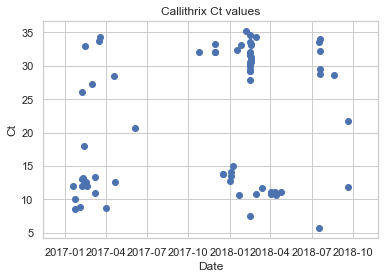

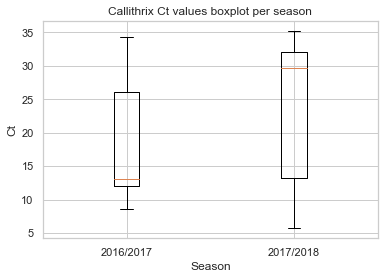

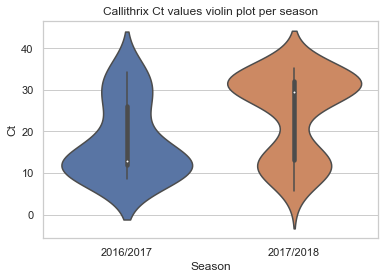

In [77]:
plot_figures('Callithrix', callithrix_df)

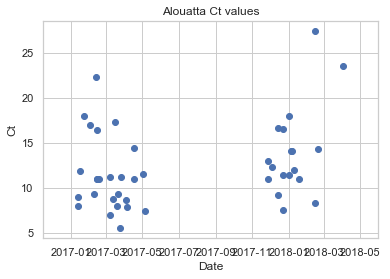

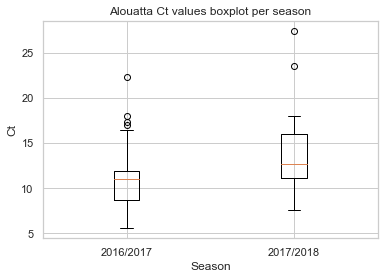

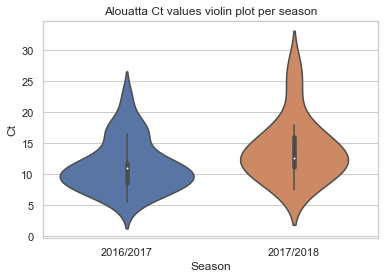

In [78]:
plot_figures('Alouatta', alouatta_df)